In [36]:
import numpy as np
# for dataframe manipulations
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for missing values
import missingno as mno
# for date time manipulation
import datetime
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
# setting up the background style for the plots
plt.style.use('fivethirtyeight')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#read the data
data=pd.read_csv('/content/drive/MyDrive/train.csv')

In [39]:

# lets also check the shape of the dataset
print(data.shape)

(13994, 30)


In [40]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [41]:
data.drop(['player_id'], axis=1)

,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,59.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,62.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,69.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,86.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,57.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,60.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,73.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,50.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,51.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1


In [42]:
data.columns


Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

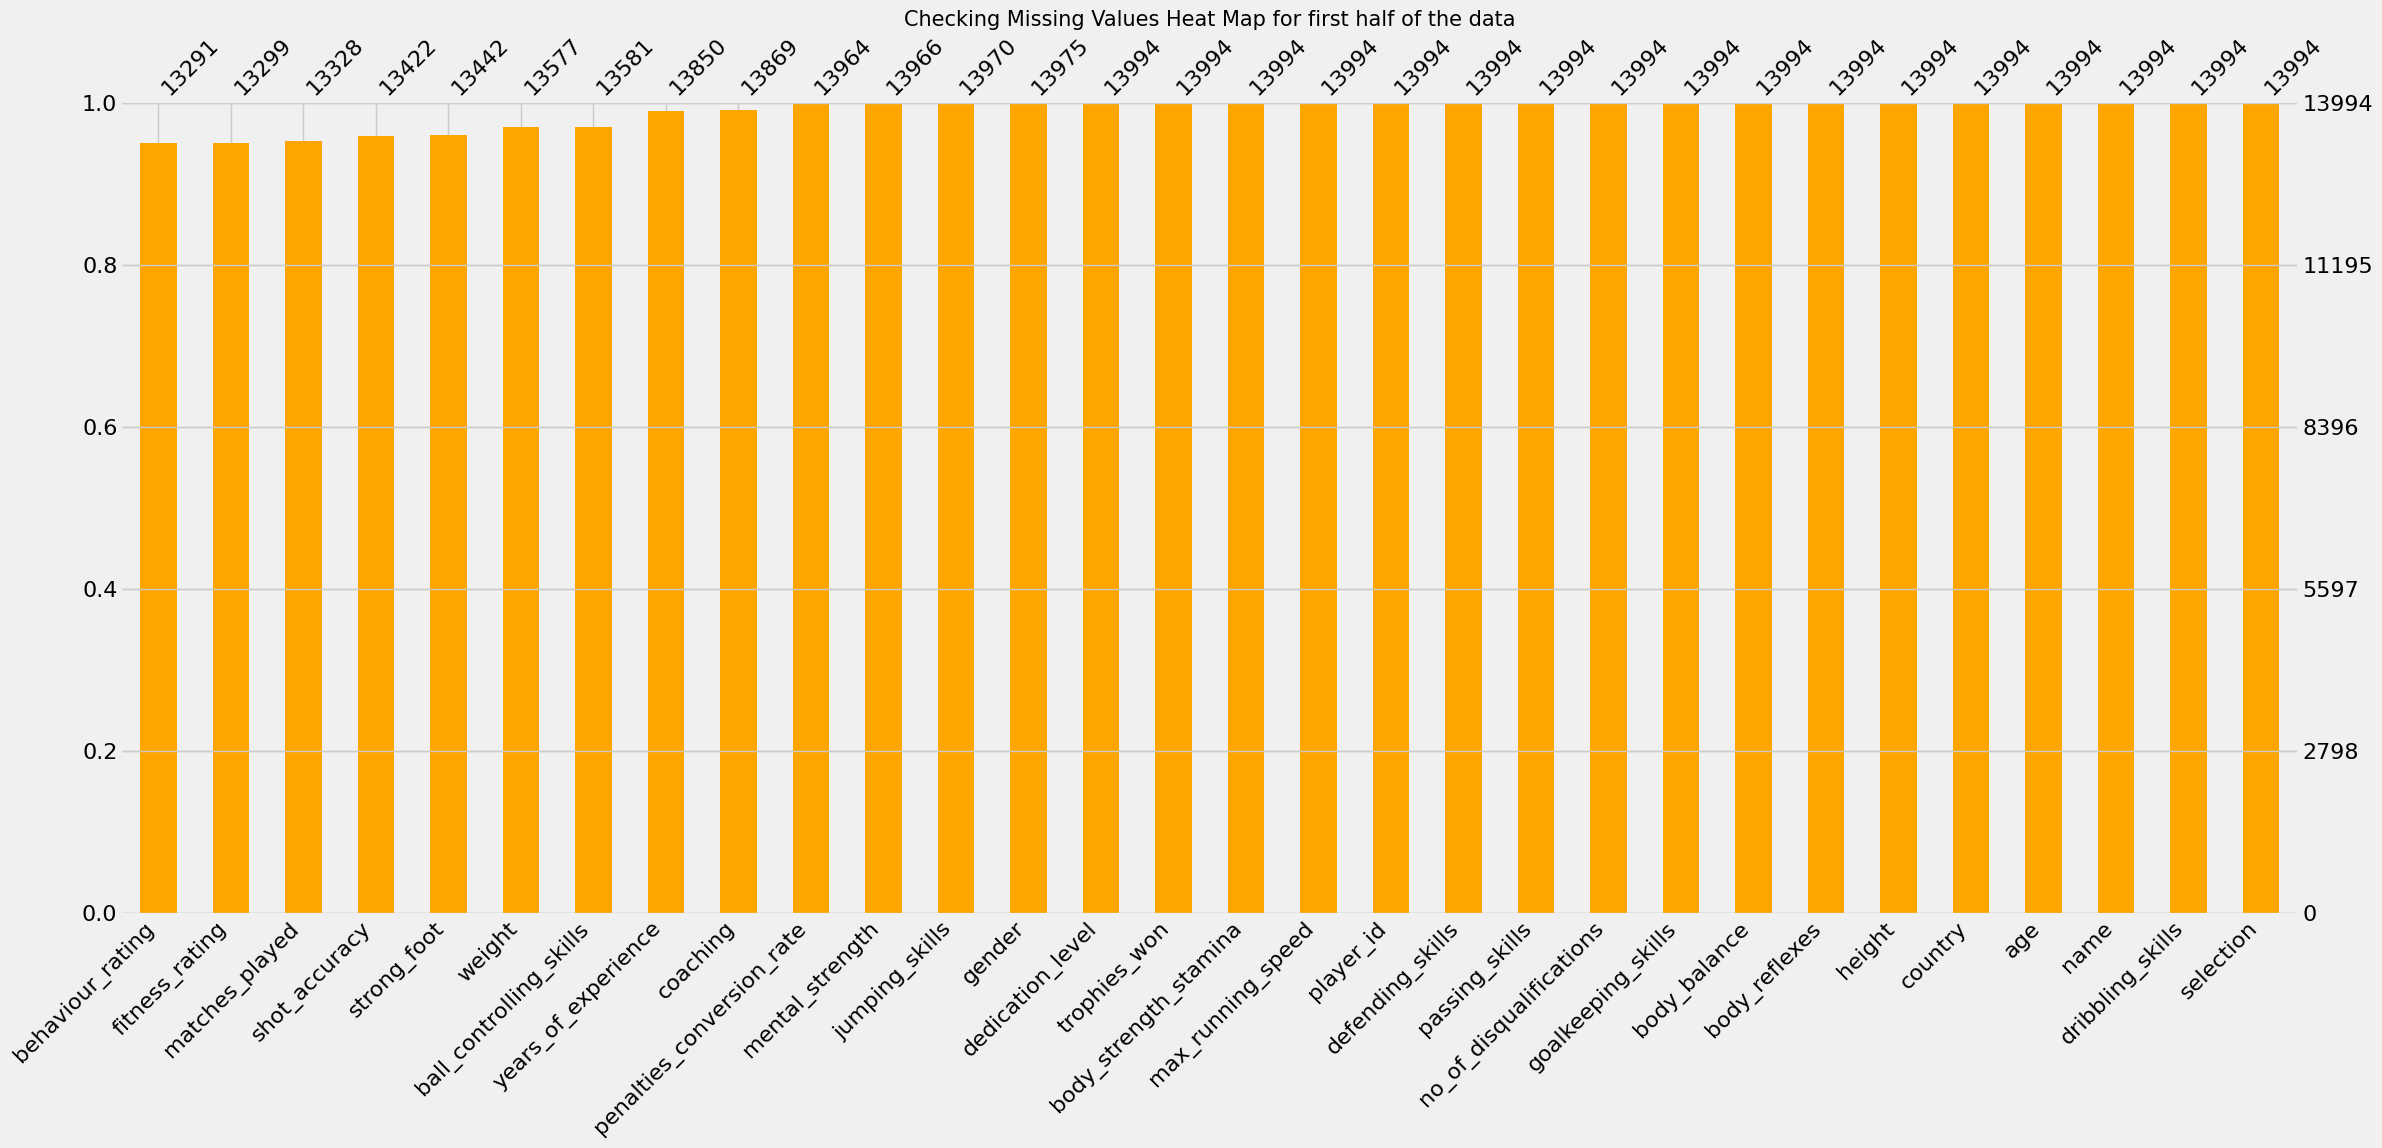

In [43]:
#Cleaning Data
# checking if the data contains any NULL value
# Visualize missing values as a matrix
mno.bar(data.iloc[:, :40],
 color = 'orange',
 sort = 'ascending')
plt.title('Checking Missing Values Heat Map for first half of the data', fontsize =
15)
plt.show()




In [44]:
#Missing Values Imputation
# filling the missing value for the continous variables for proper data visualization
data['behaviour_rating'].fillna(data['behaviour_rating'].mean(), inplace = True)
data['fitness_rating'].fillna(data['fitness_rating'].mean(), inplace = True)
data['matches_played'].fillna(data['matches_played'].mean(), inplace = True)
data['shot_accuracy'].fillna(data['shot_accuracy'].mean(), inplace = True)
data['ball_controlling_skills'].fillna(data['ball_controlling_skills'].mean(), inplace = True)
data['years_of_experience'].fillna(data['years_of_experience'].mean(), inplace = True)
data['penalties_conversion_rate'].fillna(data['penalties_conversion_rate'].mean(), inplace =True)
data['mental_strength'].fillna(data['mental_strength'].mean(), inplace = True)
data['jumping_skills'].fillna(data['jumping_skills'].mean(), inplace = True)
data['weight'].fillna('160lbs', inplace = True)
data['strong_foot'].fillna('Any', inplace = True)
data['coaching'].fillna('Unknown', inplace = True)
data['gender'].fillna('M', inplace = True)
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [45]:
data['strong_foot'] = data['strong_foot'].replace({'left':0 , 'right':1})

In [46]:
# lets check whether the data still has any missing values
data.isnull().sum().sum()

0

In [47]:
def overall_rating(data):
 return int(overall_rating((data[['fitness_rating',
 'behaviour_rating']].mean()).mean()))

<ipython-input-48-1c973b77d454>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['defending_skills'], color = 'red')


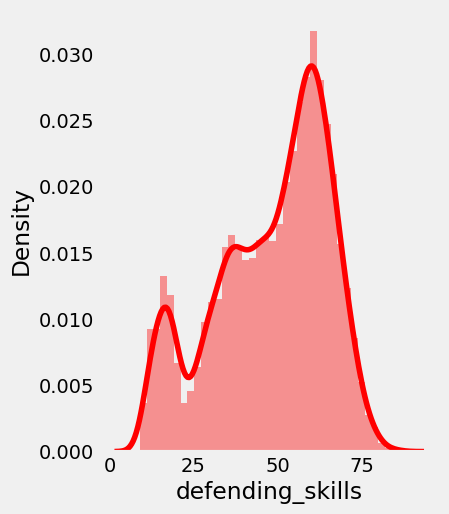

In [48]:
# lets check the Distribution of Scores of Different Skills
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['defending_skills'], color = 'red')
plt.grid()


In [91]:
# split data into x and y
X = data.drop(columns=['fitness_rating','player_id','name','gender','country','height','weight','strong_foot','dedication_level','coaching'])
y = data['fitness_rating']

<Axes: >

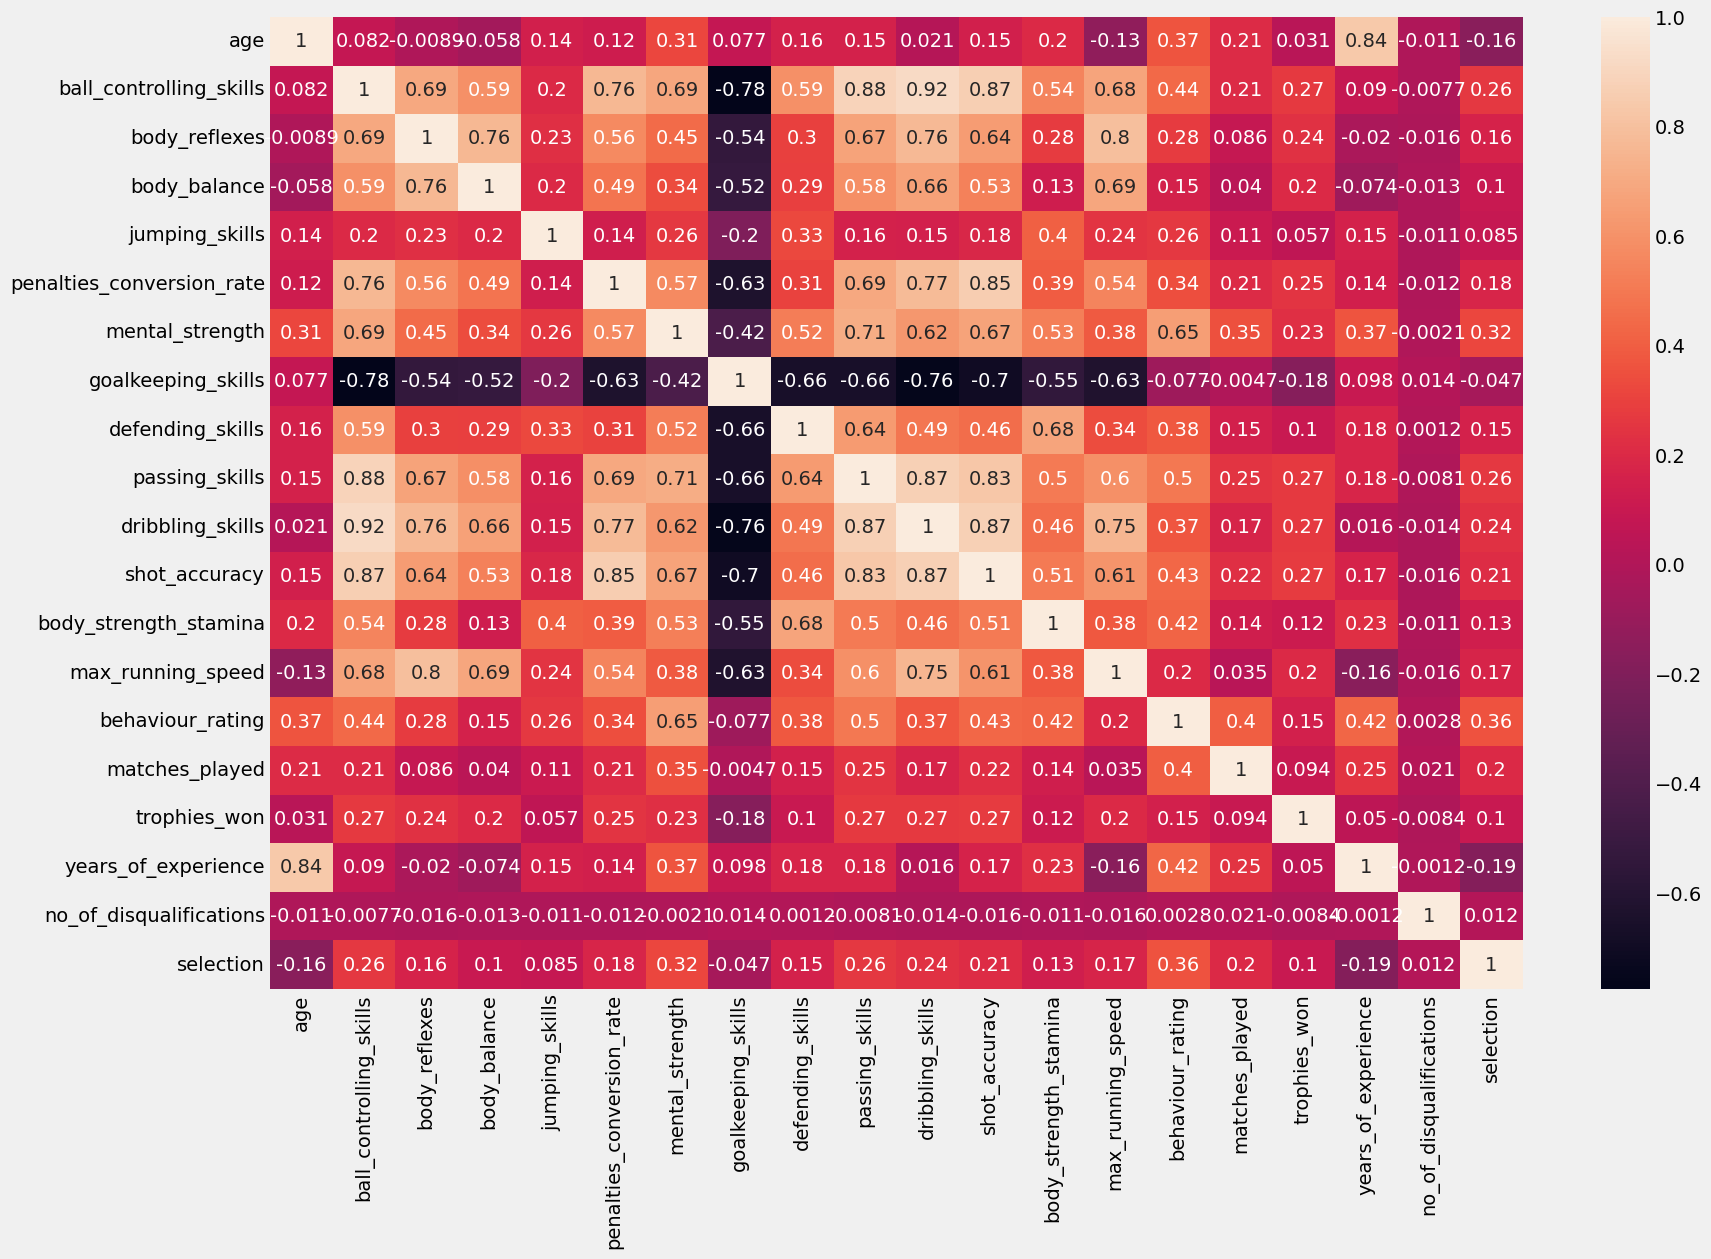

In [92]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True)


In [93]:

cor = X.corr()

In [94]:
cor[cor>0.9].sum() #there are some instances where 1 or more columns have mox corr, but we will try to forget that ane move forward

age                          1.000000
ball_controlling_skills      1.921266
body_reflexes                1.000000
body_balance                 1.000000
jumping_skills               1.000000
penalties_conversion_rate    1.000000
mental_strength              1.000000
goalkeeping_skills           1.000000
defending_skills             1.000000
passing_skills               1.000000
dribbling_skills             1.921266
shot_accuracy                1.000000
body_strength_stamina        1.000000
max_running_speed            1.000000
behaviour_rating             1.000000
matches_played               1.000000
trophies_won                 1.000000
years_of_experience          1.000000
no_of_disqualifications      1.000000
selection                    1.000000
dtype: float64

In [95]:
# Train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 355)

In [96]:
# scale the data using standard scalar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [97]:
# applying normal regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

y_test_pred = l_reg.predict(x_test)

print('-'*70)
print('Linear Regression model')
print('-'*70)
print(f'train score : {l_reg.score(x_train, y_train)}')
print(f'test score  : {l_reg.score(x_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')

----------------------------------------------------------------------
Linear Regression model
----------------------------------------------------------------------
train score : 0.8270574646438786
test score  : 0.834986179225914
----------------------------------------------------------------------
r2 score for test  : 0.834986179225914


In [98]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:0.4999563554305981
MSE:0.47120561185770266
RMSE:0.6864441797099766


In [101]:
# lasso regularization
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [102]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.018858087882215324

In [103]:

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.018858087882215324)

In [104]:
lasso_reg.score(x_test, y_test)

0.8347157874722859

In [106]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([4.71231695, 8.8257221 , 4.66510131, 7.52969318, 9.5435557 ,
       3.87796708, 5.83840004, 5.20062089, 1.03439859, 0.96723943,
       8.00202392, 7.18174268, 2.16956582, 8.92821759, 3.70624204,
       5.90963923, 4.81592623, 8.88223141, 8.52429443, 1.42060412,
       8.1204546 , 1.87392437, 3.01060376, 1.69682373, 6.96464017,
       8.25650094, 1.98773289, 8.38841808, 2.81433006, 4.90910025,
       2.95390204, 4.35169239, 0.73052065, 1.29129936, 5.76399885,
       0.79813863, 8.64265109, 3.90486415, 6.94374925, 4.76342122,
       3.55337912, 8.28458296, 2.13706144, 0.53229144, 1.93052518,
       6.17237143, 8.57784727, 9.77471225, 7.88933485, 6.75627362]),
        cv=10)

In [107]:
ridgecv.alpha_

9.774712251319295

In [108]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=9.774712251319295)

In [109]:

ridge_model.score(x_test, y_test)

0.8349867643092831

In [110]:
ridge_model.score(x_train, y_train)

0.8270574522572145

In [111]:
# as we get same results even after applying the l1 and l2 regularization
# hence, we conclude that our model is not overfitted

In [112]:

# lets try random forest model and try to increase score

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

y_test_pred = rf_reg.predict(x_test)

print('-'*70)
print('Random Forest Regression model')
print('-'*70)
print(f'train score : {rf_reg.score(x_train, y_train)}')
print(f'test score  : {rf_reg.score(x_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')

----------------------------------------------------------------------
Random Forest Regression model
----------------------------------------------------------------------
train score : 0.9762188145443359
test score  : 0.8326170039294293
----------------------------------------------------------------------
r2 score for test  : 0.8326170039294293


In [114]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:0.5015517025472424
MSE:0.4779709160603526
RMSE:0.6913544069870045


In [115]:
#As we can see that score and validation values using Ridge regression model are far better than using LinearRegression
#So, we can conclude that RRidge regression model suits for model

